In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import random
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Setup
from pathlib import Path

IMAGES_PATH = Path() / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Read new csv and show
df = pd.read_csv('./data/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.20,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.2,...,38.0,6000.0,5.26,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.32,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.90,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.90,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.20,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.40,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.90,0,0,0,0,0,0,1


In [4]:
#Input features with if-sentence
col_ot = 'pcv'
col_rc = 'rc'
col_wc = 'wc'
col_used = [col_ot, col_rc, col_wc]
col_dep = 'classification' #for predictions
all_cols= (df[col_ot]<= 45.0).all() and (df[col_rc] <= 5.20000).all() and (df[col_wc] <= 7300.0).all()

#n_pcv =(df[col_ot] >= 45.0).all()
if all_cols == True:
   col_dep == 0
else:
   col_dep == 1
#col_ot = n_pcv

   
col_ot1 = [col for col in col_used] #input features

df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [11]:
pcv_pred = pd.DataFrame({'PCV generado': arr_pcv, 'RC generado': arr_rc, 'WC generado': arr_wc, 'KND?': y_pred})
pcv_pred

,PCV generado,RC generado,WC generado,KND?
0,99.576514,0.995234,4701.155423,0
1,36.348109,1.876318,3961.684671,1
2,82.433609,7.894443,8643.728566,1
3,33.370618,8.175708,1663.050036,0
4,32.306001,8.531299,6045.111581,0
...,...,...,...,...
75,85.760484,5.190881,3281.858626,0
76,23.602407,8.721592,4106.640260,1
77,74.333319,8.953497,105.879964,1
78,89.983882,7.171295,1991.404364,1


In [12]:
#train_test_split and x, y declarations
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('x_train:', len(X_train),'\n',
      'y_train:', len(y_train),'\n',
      'x_test:', len(X_test),'\n',
      'y_test:', len(y_test))

x_train: 320 
 y_train: 320 
 x_test: 80 
 y_test: 80


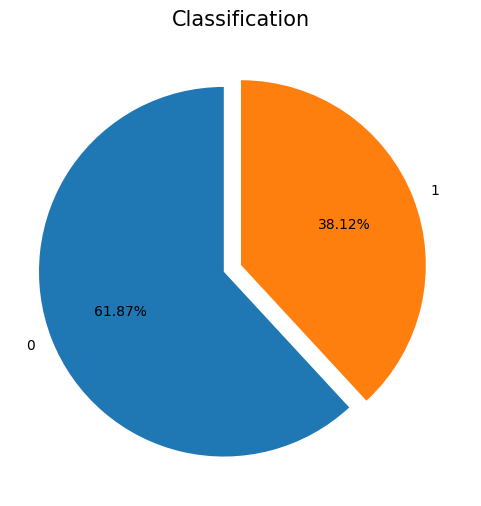

In [9]:
# To see how the data is distributed
attr_count = y_train.value_counts()
attr_label = y_train.value_counts().index

# plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.pie(attr_count, explode=(0.1, 0), labels=attr_label, autopct='%.2f%%', startangle=90)
ax.set_title('Classification', fontsize=15)
plt.show()

In [10]:
#DTC and accuracy_score
acd = tree.DecisionTreeClassifier()

model = acd.fit(X_train, y_train)

y_pred = acd.predict(X_test)
acd_acc = accuracy_score(y_test, y_pred)

print (f"Accuracy_score is:" , acd_acc)

Accuracy_score is: 0.975


[Text(0.6166666666666667, 0.9285714285714286, 'X[14] <= 13.25\ngini = 0.472\nsamples = 320\nvalue = [198, 122]'),
 Text(0.43333333333333335, 0.7857142857142857, 'X[15] <= 44.6\ngini = 0.081\nsamples = 190\nvalue = [182, 8]'),
 Text(0.26666666666666666, 0.6428571428571429, 'X[15] <= 40.2\ngini = 0.052\nsamples = 186\nvalue = [181, 5]'),
 Text(0.13333333333333333, 0.5, 'X[17] <= 6.04\ngini = 0.012\nsamples = 168\nvalue = [167, 1]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.2, 0.35714285714285715, 'X[3] <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'X[10] <= 17.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667, 

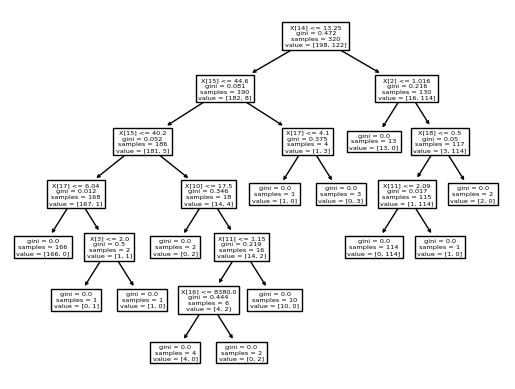

In [13]:
#Visualization of the tree
tree.plot_tree(acd)

In [14]:
#Matrix Confusion
cm = confusion_matrix( y_test, y_pred, labels=[True, False])
cm

array([[27,  1],
       [ 1, 51]], dtype=int64)

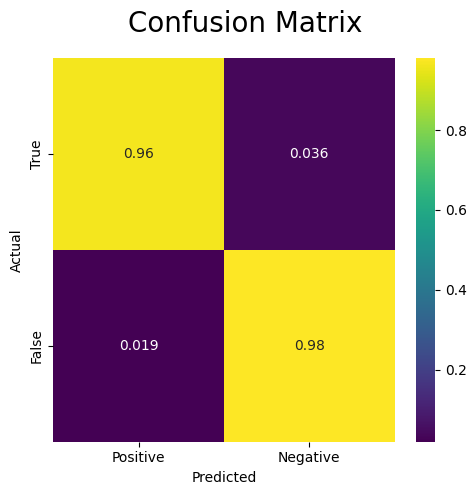

In [15]:
# Matrix plot
cmn = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])#*100
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn,annot=True, cmap='viridis', xticklabels=["Positive", "Negative"], yticklabels=[True, False])
plt.suptitle("Confusion Matrix", fontsize= 20)
plt.ylabel('Actual')
plt.xlabel('Predicted')

save_fig("matrix_confusion")
plt.show()

In [16]:
#classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [17]:
#MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"The Mean Absolute Error is :", mae)
print(f"The Root Mean Squared Erros is:",rmse)

The Mean Absolute Error is : 0.025
The Root Mean Squared Erros is: 0.15811388300841897


In [18]:
# Getting precision, recall, F1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
acc = round(acc, 2)
print('accuracy:', acc)

prc = precision_score(y_test, y_pred)
prc = round(prc, 2)
print('precision_score:', prc)

rcll = recall_score(y_test, y_pred)
rcll = round(rcll, 2)
print('recall_score:', rcll)

f1scr = f1_score(y_test, y_pred)
f1scr = round(f1scr, 2)
print('f1_score:', f1scr)

accuracy: 0.98
precision_score: 0.96
recall_score: 0.96
f1_score: 0.96


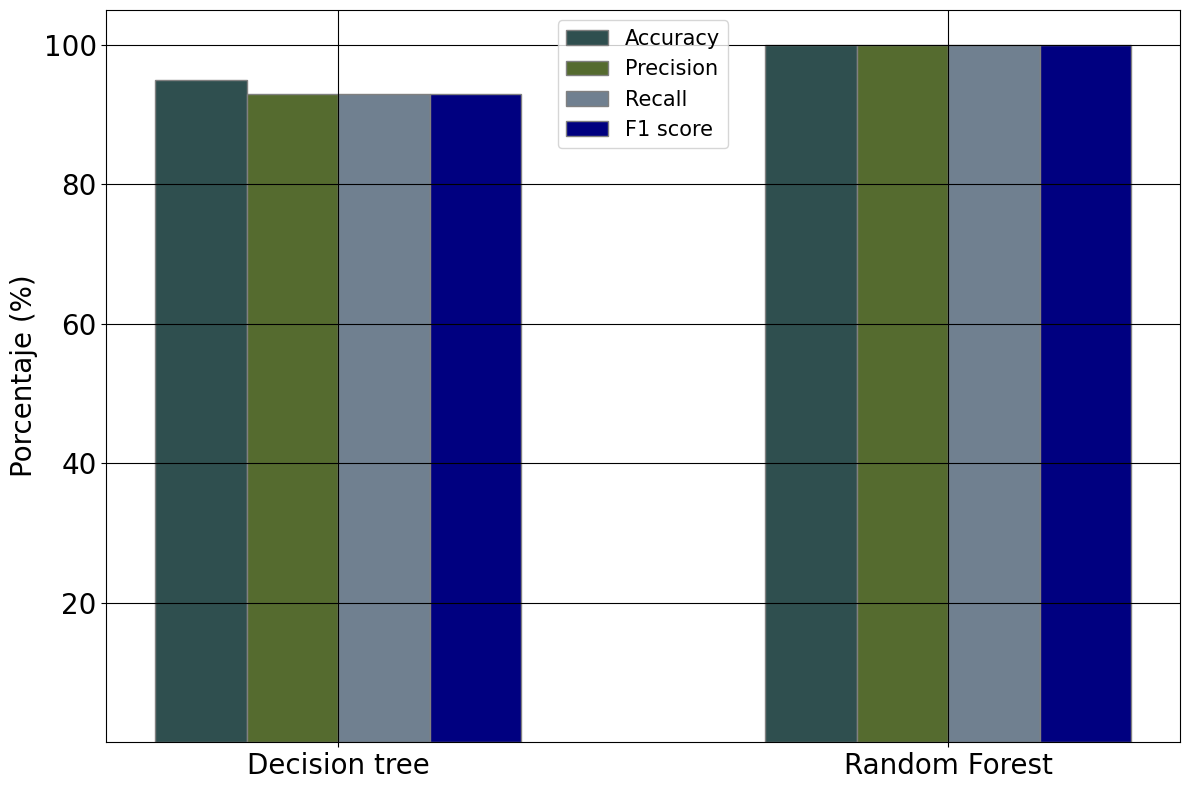

In [19]:
# Ploting accuracy, precision_score, recall_score, f1_score

# Set width of bar
barWidth = 0.15
fig = plt.subplots(figsize=(12, 8))

# Set height of bar

models = ['Decision tree', 'Random Forest']
accuracy = [95, 100]
precision = [93, 100]
recall = [93, 100]
f1_score = [93, 100]

# St positions of bat on X axis
pos1_acc = np.arange(len(accuracy))
pos2_pre = [x + barWidth for x in pos1_acc]
pos3_rec = [x + barWidth for x in pos2_pre]
pos4_f1 = [x + barWidth for x in pos3_rec]

# Mat the plot
plt.bar(pos1_acc, accuracy, color='darkslategray', width=barWidth, 
    edgecolor='grey', label='Accuracy')
plt.bar(pos2_pre, precision, color='darkolivegreen', width=barWidth,
    edgecolor='grey', label='Precision')
plt.bar(pos3_rec, recall, color='slategray', width=barWidth,
    edgecolor='grey', label='Recall')
plt.bar(pos4_f1, f1_score, color='navy', width=barWidth,
    edgecolor='grey', label='F1 score')


# Adding Xticks
plt.ylabel('Porcentaje (%)', fontsize=20)
plt.xticks([r + 1.5*barWidth for r in range(len(accuracy))], models, fontsize=20)
plt.yticks([20, 40, 60, 80, 100], fontsize=20)

plt.legend(fontsize=15, loc="upper center")
plt.grid(color="black")
save_fig("comparison_models")

plt.show()

In [20]:
# Getting probabilities
y_pred_proba = acd.predict_proba(X_test)
y_score = y_pred_proba[:, 1]

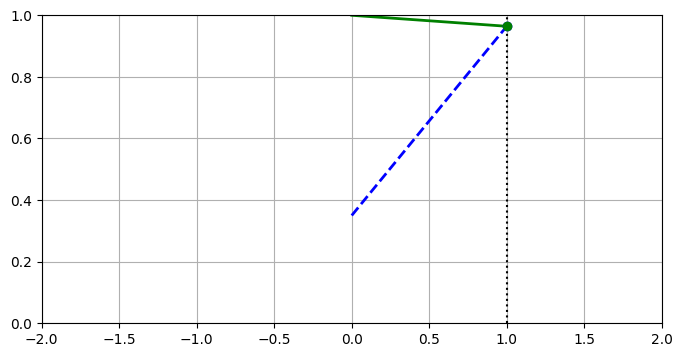

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
threshold = 1

# Plotting precision and recall of threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Beautifies the figure
idx = (thresholds >= threshold).argmax() # First index
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")

plt.axis([-2, 2, 0, 1])
plt.grid()

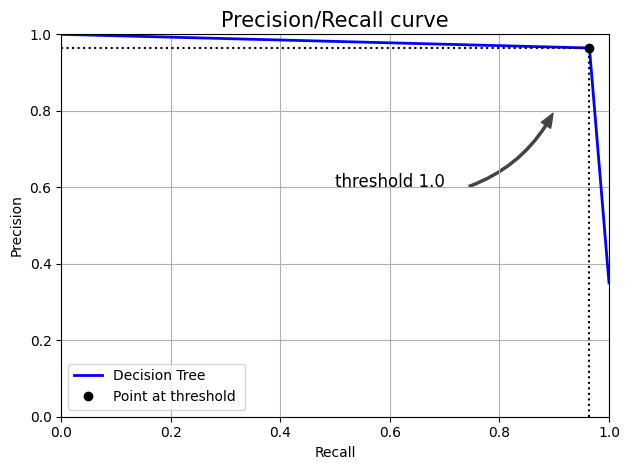

In [22]:
import matplotlib.patches as patches # extra-code - for the curved arrow
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
threshold = 1

# Plot the curve
plt.plot(recalls, precisions, "b-", linewidth=2, label="Decision Tree")

# Plot the dot
idx = (thresholds >= threshold).argmax()
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold ")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.74, 0.6), (0.90, 0.8),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"
))

plt.text(0.50, 0.6, "threshold 1.0", fontsize=12)
plt.title("Precision/Recall curve", fontsize=15)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.axis([0, 1, 0, 1])
plt.grid()

save_fig("Precision_recall")
plt.show()

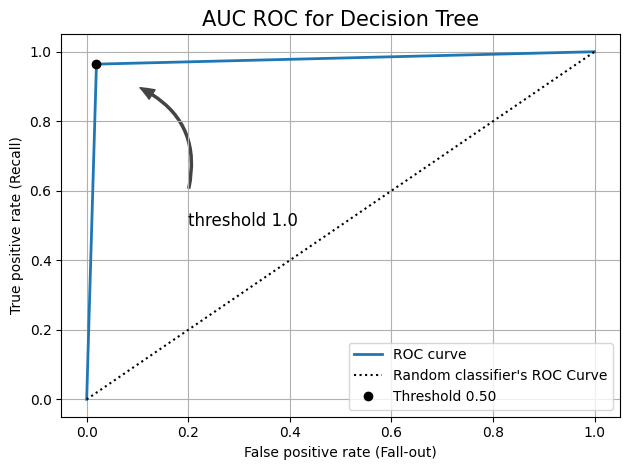

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
threshold = 1

fpr, tpr, thresholds = roc_curve(y_test, y_score)
idx = (thresholds <= threshold).argmax()

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC Curve")
plt.plot([fpr[idx]], [tpr[idx]], "ko", label="Threshold 0.50")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.2, 0.6), (0.1, 0.9),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.2, 0.5, "threshold 1.0", fontsize=12)
plt.title("AUC ROC for Decision Tree", fontsize=15)
plt.ylabel("True positive rate (Recall)")
plt.xlabel("False positive rate (Fall-out)")
#plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend()

save_fig("AUC ROC")
plt.show()

In [24]:
# Plotting ROC AUC
from sklearn.metrics import roc_auc_score

roc_auc_scr = roc_auc_score(y_test, y_score)
print('roc_auc_scr:', roc_auc_scr)

roc_auc_scr: 0.9725274725274725


In [25]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
score = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv=10)
print('Average Accuracy Score {}'.format(score))
print('Median:', score.mean())

Average Accuracy Score [0.96875 0.90625 0.90625 0.96875 1.      0.90625 0.90625 0.9375  0.96875
 0.96875]
Median: 0.94375
